# Esercitazione 8

Elisa Stabilini - 942529

In [2]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Obiettivo: determinare numericamente lo stato fondamentale di un sistema quantistico per una Hamiltoniana $H$ con potenziale $V(x)$
$$ V(x) = x^4 - \frac{5}{2}x^2 $$

Per farlo si utilizza il principio variazionale con l'obiettivo di minimizzare la seguente quantità

$$\langle {\hat H} \rangle_T = 
\frac{\int dx \psi^*_T(x) {\hat H} \psi_T(x)}
{\int dx |\psi_T(x)|^2} $$

utilizzando come funzione d'onda di prova $\psi_T^{\sigma, \mu}$ dove $\sigma$ e $\mu$ sono due parametri variazionali.

$$
\psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$


## Esercizio 1

Applicando il principio variazionale, il valore di aspettazione della hamiltoniana $H$ del sistema sulla funzione test sarà sempre maggiore del valore di aspettazione sullo stato fondamentale e sarà dato da 
$$
\langle \hat{H}\rangle_T = \frac{\int dx\psi_T^{\mu,\sigma *}(x)\hat{H}\psi_T^{\mu,\sigma }(x)}{\int dx |\psi_T^{\mu,\sigma}(x)|^2}
= \int dx \frac{|\psi_T^{\mu,\sigma}(x)|^2}{\int dx |\psi_T^{\mu,\sigma}(x)|^2} \frac{{\hat H} \psi_T^{\mu,\sigma}(x)}{\psi_T^{\mu,\sigma}(x)} = \int dxp(x)E_{loc}(x)$$

In particolare si osserva che la funzione $p(x)$ è una densità di probabilità e può essere campionata utilizzando l'algoritmo di Metropolis mentre $E_{loc}(x)$ è nota e campionabile direttamente; l'integrale può quindi essere risolto con tecniche montecarlo.

Osservazione: Si parla di *Variational Monte Carlo* quando si utilizzano algoritmi di Metropolis e Monte Carlo per clacolare dei valori di aspettazione.

L'obiettivo della prima parte dell'esercitazione è quello di calcolare l'energia media data una funzione di prova ($\mu$ e $\sigma$ fissati).
Partendo da una posizione $x$ (in cui $|\psi(X)|$ è non troppo piccolo propongo uno spostamento $\delta$ che accetto con probabilità $p(x)=\frac{|\psi(x+\delta)|^2}{|\psi(x)|^2}$.

## Esercizio 2

Il problema di trovare lo stato fondamentale (e quindi l'energia di stato fondamentale) è un problema di ottimizzazione, in questo caso bisogna trovare i parametri $\sigma$ e $\mu$ che minimizzano $\langle \hat{H}\rangle_T$, per risolverlo è possibile utilizzare l'algoritmo di *simulated annealing* (SA).

Per minimizzare l'energia (in generale la funzione costo) raffreddo lentamente il sistema. Come sempre in fisica statistica costruisco la funzione di Boltzmann $$\frac{e^{-\beta H_{\mu,\sigma}}}{Z}$$. 

Raffreddare il sistema significa aumentare $\beta$, si osserva infatti che all'aumentare di $\beta$ la distribuzione di Boltzmann si concentra nei minimi di H (ovvero la funzione costo).
Il *simulated annealing* viene eseguito a blocchi di 10 passi (10 campionamenti della distribuzione di Boltzmann a temperatura fissata) fino a quando l'errore su $\langle\hat{H}\rangle_T$ non è sceso al di sotto di $0.0015$.

Ogni stima dell'integrale è ottenuta con 70000 campionamenti. Per il camiponamento è stato utilizzato l'algoritmo di Metropolis in cui la mossa proposta è uno spostamento di $\Delta$ con $\Delta = \frac{1}{\beta}$ e $\beta_i =\beta_{i-1} +2.5$. I parametri sono stati scleti per avere un tasso di accettazione del 50% circa.

### Punto 1

Mostrare un'immagine di $\langle \hat{H} \rangle_T$ (includendo anche le incertezze statistiche) come funzione del numero di step dell'algoritmo SA

mu = 0.82, sigma = 0.62


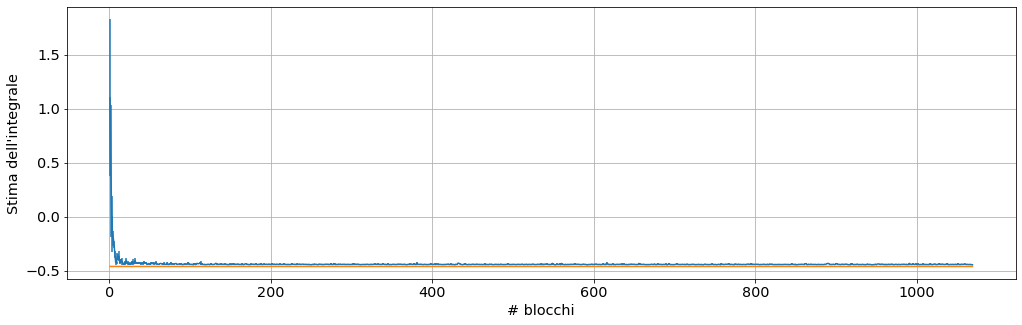

In [5]:
iblk, I, error, Iblk, blk_err = np.loadtxt("annealing.dat", usecols=(0,1,2,3,4), delimiter=',', unpack='true')

actual = -0.46046587969271513
plt.figure(figsize = (17,5))
plt.errorbar(iblk,Iblk,yerr=blk_err)
plt.plot(iblk, actual*np.ones(len(iblk)))
plt.xlabel("# blocchi")
plt.xlim = 200
plt.ylabel("Stima dell'integrale")
plt.grid()
print("mu = 0.82, sigma = 0.62" )

### Punto 3

Per la coppia di parametri che minimizza il valore di aspettazione della hamiltoniana mostrare un plot della stima di $\langle \hat{H} \rangle_T$ come funzione del numero di blocchi Monte Carlo.

Fissati i valori di $\mu$ e $\sigma$ faccio una stima del valor medio di $H$.

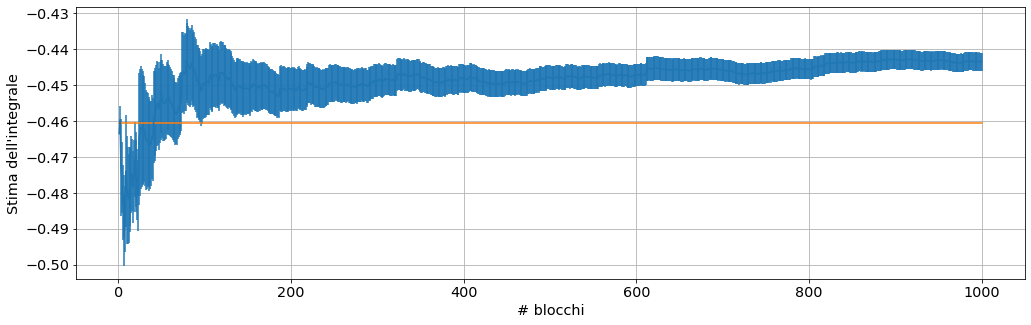

In [8]:
block, Int, err = np.loadtxt("Punto3.dat", usecols=(0,1,2), delimiter=',', unpack='true')

actual = -0.46046587969271513
plt.figure(figsize = (17,5))
plt.errorbar(block, Int, yerr=err)
plt.plot(block, actual*np.ones(len(block)))
plt.xlabel("# blocchi")
plt.ylabel("Stima dell'integrale")
plt.grid()

Il valore di energia minima trovato non è compatibile con quello atteso dalal soluzione numercia dell'equazione di Schroedinger ma non stupisce perchè le tecniche Monte Carlo non hanno l'obiettivo di individuare una soluzioen esatta al problema ma una risposta vicino alla soluzione.

### Punto 4

Mostrare una figura di $|\psi_T(x)|^2$ ottenuta dal cmapionamento come istogramma delle configurazioni che sono state campionate. *Confrontare* la $|\psi_T(x)|^2$ campionata con la *curva analitica* e con la *soluzione numerica* che si ottiene trasformando l'equazione di Schroedinger in ua equazione matriciale.

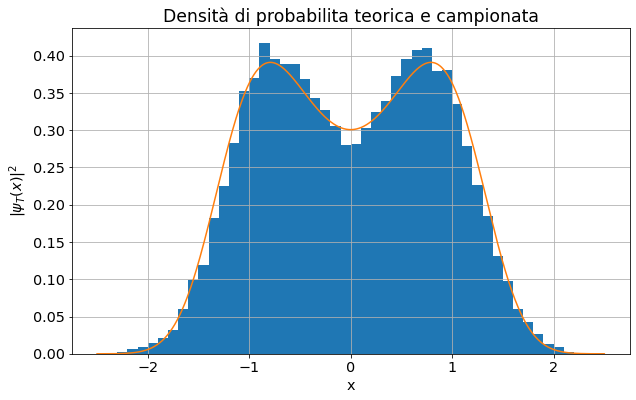

In [20]:
data = np.loadtxt("histo.dat", usecols=(0), delimiter=None, unpack='true')

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/4, a/4, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

plt.hist(data, 50, density = True, range = (-a/4,a/4) )
plt.plot(x, psi[0]**2)
plt.title("Densità di probabilita teorica e campionata")
plt.xlabel("x")
plt.ylabel("$|\psi_T(x)|^2$")
plt.grid()
plt.show()

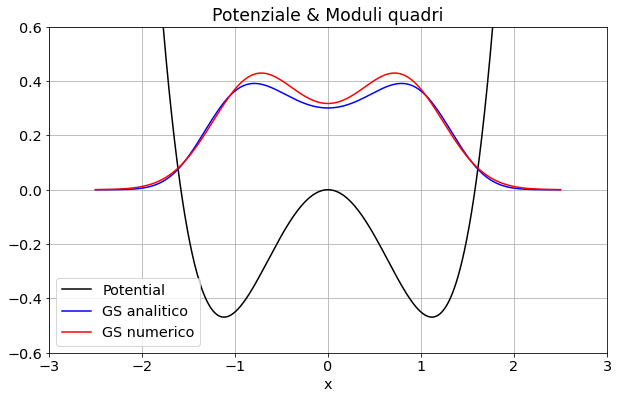

In [16]:
#plot soluzione numerica - NB: sono mu e sigma di prova
mu = 0.806
sigma = 0.6384
gau = 1/(sigma*np.sqrt(2*np.pi)) * (np.exp(-(x-mu)**2/(2*sigma**2)) + np.exp(-(x+mu)**2/(2*sigma**2)))

# Plot a few things
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, color="Blue", label="GS analitico") #plot GS analitico
plt.plot(x,(gau**2), color="Red", label="GS numerico")#plot GS numerico
#soluzione con simulated Annealing
plt.title("Potenziale & Moduli quadri")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend()
plt.show()

In figura sono mostrati i grafici del potenziale in cui si sta muovendo la particella, il *ground state* ottenuto con metodi analitici e il *ground state* ottenuto con l'SA (è stato plottato utilizzando i valori finali ottenuti per i parametri $\mu$ e $\sigma$).
Dal grafico si può notare che la soluzione numerica non coincide con quella analitica; questo tuttavia non stupisce, le tceniche Monte Carlo infatti non forniscono una soluzione esatta ma una soluzione ad essa vicina.